# Convolutional Neural Network (CNN)
### Goal of lesson
- Understand what Convolutional Neural Network (CNN) is
- The strength of CNN
- How to use it to detect handwriting
- Extract features from pictures
- Learn Convolution, Pooling and Flatten
- How to create a CNN

### Computer Vision
- Computational methods for analyzing and understanding digital images

### Handwriting detection

<img src="img/handwritten_numbers.png" width="600" align="left">

### Naive approach
#### Map one pixel to input network - have some hidden layers - then detect.

<img src="img/pixel_numbers.png" width="600" align="left">

#### Loss of information in the structure of the image
<img src="img/dnn_example.png" width="600" align="left">

### Image Convolution
- applying a filter that adds each pixel value of an image to its neighbors, weighted according to a kernel matix

### Example of edge detection
- Using this filter

> #### Programming Notes:
> - Libraries used
>     - [**PIL**](https://pillow.readthedocs.io/en/stable/) Python Imaging Library

In [1]:
from PIL import Image, ImageFilter

In [2]:
image = Image.open('img/dobermann.jpg').convert('RGB')

In [3]:
filtered = image.filter(ImageFilter.Kernel(size=(3,3),
                                          kernel=[-1,-1,-1,-1,8,-1,-1,-1,-1],
                                          scale=1))

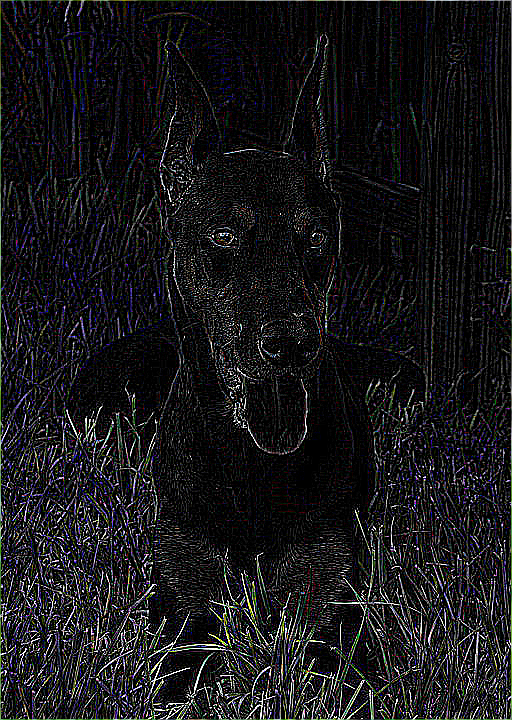

In [5]:
display(filtered)

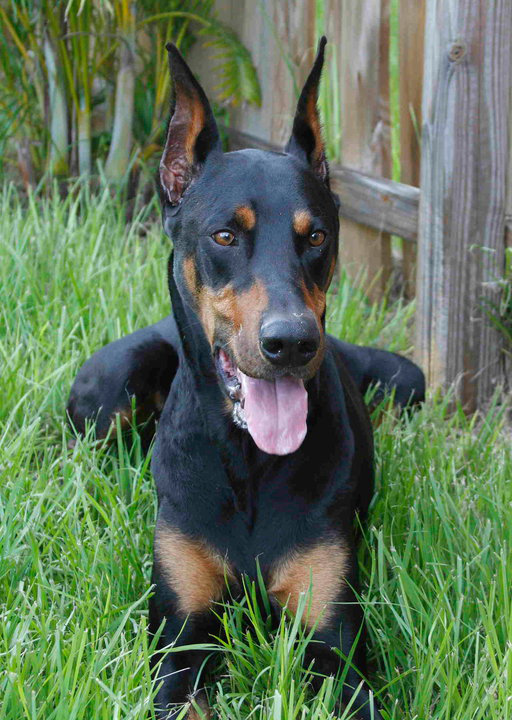

In [4]:
display(image)

### Pooling
- Reducing the size of an input by sampling from regoins in the input
- Bascially reducing the size of the image

### Max-Pooling
- Pooling by choosing the maximum value in each region

### Convolutional Neural Network (CNN)
- Neural Networks that use convolution for analyzing images

### Idea of CNN
- Input image
- Apply Convolution - possible several to get several features of the image (feature maps)
- Apply pooling (this reduces the input)
- Then flatten it out to traditional network

<img src='img/cnn_example.png' width=600, align='left'>

> #### Programming Notes:
> - Libraries used
>     - [**tensorflow**](https://www.tensorflow.org) - end-to-end open source machine learning platform
> - Functionality and concepts used
>     - [**to_categorical**](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) Converts a class vector (integers) to binary class matrix.
>     - [**Sequential**](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) provides training and inference features for a model
>     - [**Dense**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) regular densely-connected Neural Network (NN) layer.
>     - [**Dropout**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) applies Dropout to the input
>     - [**Conv2D**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) 2D convolution layer
>     - [**MaxPooling2D**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) max pooling operation for 2D spatial data
>     - [**Flatten**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) flattens the input

In [6]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
# https://en.wikipedia.org/wiki/MNIST_database
mnist = tf.keras.datasets.mnist

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [12]:
index = 2
img = Image.fromarray(x_train[index])
print(y_train[index])
display(img)

4


In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
y_train.shape

(60000, 10)

In [17]:
x_train.shape

(60000, 28, 28)

In [19]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [20]:
x_train.shape

(60000, 28, 28, 1)

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(10, activation='softmax'))

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2452 - accuracy: 0.9264
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1053 - accuracy: 0.9682
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0778 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0633 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0546 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0461 - accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0401 - accuracy: 0.9875
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0357 - accuracy: 0.9882
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0338 - accuracy: 0.9888
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - los

[0.044051263481378555, 0.9868000149726868]